In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip
%cd fastText-0.2.0
!make

--2020-06-19 14:21:01--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/0.2.0 [following]
--2020-06-19 14:21:01--  https://codeload.github.com/facebookresearch/fastText/zip/0.2.0
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.2.0.zip’

0.2.0.zip               [  <=>               ]   4.10M  13.4MB/s    in 0.3s    

2020-06-19 14:21:01 (13.4 MB/s) - ‘0.2.0.zip’ saved [4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
   creating: fastText-0.2.0/
   creating: fastText-0.2.0/.circleci/
  inflating: fastText-0.2.0/.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/BE PROJECT/Data sets/cleaned_dataset.csv')
df.head()

,Unnamed: 0,Case Name,Judgement,label
0,0,GilbertJohnMendoncaVStateOfMaharashtra,pc application bail file accuse try offence pu...,1
1,1,GopalBhujangraoKadamVStateOfMaharashtraThrSecr...,per sunil b shukre j 1 rule rule make returnab...,1
2,2,GopalGoyalVStateOfNctOfDelhi,pk bhasin j 1 application section 438 code cri...,1
3,3,GraceRaiRoseVIntelligenceOfficerNarcoticsContr...,prayer criminal petition file section 439 crpc...,1
4,4,GovindPrasadLathVStateOfWestBengal,ng talukdar j 1 application bail file behalf o...,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from io import StringIO
col = ['label', 'Judgement']
cases = df[col]
cases.head()

,label,Judgement
0,1,pc application bail file accuse try offence pu...
1,1,per sunil b shukre j 1 rule rule make returnab...
2,1,pk bhasin j 1 application section 438 code cri...
3,1,prayer criminal petition file section 439 crpc...
4,1,ng talukdar j 1 application bail file behalf o...


In [ ]:
cases['label']= ['__label__'+ str(s) for s in cases['label']]
print(cases)

           label                                          Judgement
0     __label__1  pc application bail file accuse try offence pu...
1     __label__1  per sunil b shukre j 1 rule rule make returnab...
2     __label__1  pk bhasin j 1 application section 438 code cri...
3     __label__1  prayer criminal petition file section 439 crpc...
4     __label__1  ng talukdar j 1 application bail file behalf o...
...          ...                                                ...
2021  __label__0  v savant j 1 learn length applicant respondent...
2022  __label__0  av savant j petition advocate seek cancellatio...
2023  __label__0  1 application file applicant prayer applicant ...
2024  __label__0  jagoish sahai j 1 petitioner come article 226 ...
2025  __label__0  1 applicant prefer present bail application se...

[2026 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Judgement'], df['label'], test_size=0.3, random_state=42)

In [ ]:
X_train.head()
y_train.head()

1932    0
1240    1
575     1
557     1
1204    1
Name: label, dtype: int64

In [ ]:
y_train= ['__label__'+ str(s) for s in y_train]

In [ ]:
y_test= ['__label__'+ str(s) for s in y_test]

In [ ]:
print(y_train)

['__label__0', '__label__1', '__label__1', '__label__1', '__label__1', '__label__0', '__label__0', '__label__1', '__label__1', '__label__0', '__label__1', '__label__0', '__label__1', '__label__1', '__label__1', '__label__1', '__label__0', '__label__0', '__label__1', '__label__0', '__label__1', '__label__0', '__label__1', '__label__1', '__label__1', '__label__1', '__label__1', '__label__0', '__label__0', '__label__1', '__label__1', '__label__0', '__label__1', '__label__0', '__label__1', '__label__0', '__label__1', '__label__1', '__label__0', '__label__0', '__label__1', '__label__0', '__label__0', '__label__1', '__label__1', '__label__0', '__label__0', '__label__0', '__label__1', '__label__1', '__label__0', '__label__1', '__label__0', '__label__1', '__label__0', '__label__1', '__label__1', '__label__1', '__label__1', '__label__0', '__label__1', '__label__1', '__label__1', '__label__1', '__label__1', '__label__1', '__label__0', '__label__0', '__label__1', '__label__0', '__label__1', '__la

In [ ]:
print(type(y_test))

<class 'list'>


In [ ]:
d= {'label': y_train, 'Judgement': X_train}
train_cases = pd.DataFrame(d)


In [ ]:
train_cases.head()

,label,Judgement
1932,__label__0,1 application state cancellation bail four acc...
1240,__label__1,oral judgment make returnable forthwith consen...
575,__label__1,1 order propose decide abovementioned two bail...
557,__label__1,v p tipnis j 1 petitioner minor girl represent...
1204,__label__1,1 history unusual determination relevant fact ...


In [ ]:
d= {'Judgement': X_test}
test_cases = pd.DataFrame(d)
test_cases.head()

,Judgement
1284,1 vide petition assail order date pass learn a...
982,petition wife aggrieve order whereby judge app...
1542,av savant j application make judge expunge cer...
593,oral judgment 1 present applicant question cor...
1292,oral judgment 1 make returnable forthwith hear...


In [ ]:
import csv
train_cases.to_csv('/content/fastText-0.2.0/train_cases.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [ ]:
import csv
test_cases.to_csv('/content/fastText-0.2.0/test_cases.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [ ]:
% cd /content/fastText-0.2.0/


/content/fastText-0.2.0


In [ ]:
!ls

alignment		   Makefile		    runtests.py
args.o			   MANIFEST.in		    scripts
classification-example.sh  matrix.o		    setup.cfg
classification-results.sh  meter.o		    setup.py
CMakeLists.txt		   model.bin		    src
CONTRIBUTING.md		   model.o		    test_cases.txt
dictionary.o		   model.vec		    tests
docs			   pretrained-vectors.md    train_cases.txt
eval.py			   productquantizer.o	    utils.o
fasttext		   python		    vector.o
fasttext.o		   qmatrix.o		    website
get-wikimedia.sh	   quantization-example.sh  wikifil.pl
LICENSE			   README.md		    word-vector-example.sh


In [ ]:
pip install scikit-plot

In [ ]:
!./fasttext supervised -input train_cases.txt -output model -lr 3 -epoch 25 -wordNgrams 3

Read 2M words
Number of words:  42036
Number of labels: 2
Progress: 100.0% words/sec/thread:  131611 lr:  0.000000 loss:  0.081566 ETA:   0h 0m


Accuracy score:  0.7894736842105263
Precision Score:  0.784725717433333
Recall Score:  0.7894736842105263


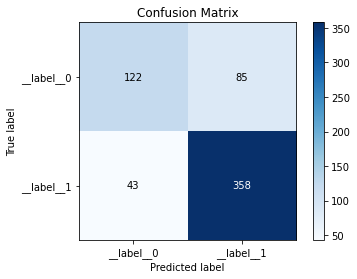

In [ ]:
!./fasttext predict model.bin test_cases.txt>output.txt
f=open('/content/fastText-0.2.0/output.txt')
output=f.read()
predicted=output.split('\n')
predicted.remove('')
from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(y_test,predicted))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
print("Precision Score: ", precision_score(y_test,predicted, average='weighted'))
print("Recall Score: ", recall_score(y_test,predicted, average='weighted'))
plot_confusion_matrix(y_test, predicted)

In [ ]:
f=open('/content/fastText-0.2.0/output.txt')

In [ ]:
output=f.read()

In [ ]:
predicted=output.split('\n')

In [ ]:
predicted.remove('')

In [ ]:
print(len(predicted))
print(len(y_test))

608
608


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted,y_test)

0.7976973684210527

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted,y_test)

array([[123,  39],
       [ 84, 362]])